## Prostate Cancer Study

- Chapter 1, 3, 11, 12, and 18

**Summary**

The data for Prostate Cancer comes from a study by Stamey at al.(1989) that examined the correlation between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were about to receive a radical protatectomy. 

The goal is to predcit the log of PSA (lpsa) from a number of measurements including log cancer volume (lcqvol), log prostate weight lweight, age, log of benign prostatic hyperplasia amount lbhp, seminal vesicle invasion svi, log of capsular penetration lcp, Gleason score gleason, and percent of Gleason scores 4 or 5 pgg45. 

**Prostate Cancer dataset scatterplot matrix**

By scatterplot the matrix of variables we can get some insights but a good predictive model is hard to construct by eye. It qualifies as a supervised regression model because the outcome measurement is quantitative. 

A scatterplot matrix shows every pairwise plot between two variables. We see that 
1. svi is a binary variable, and gleason is ordered categorical variable. 
2. both lcavol and lcp show a strong relationship with the response lpsa, and each other. 

In [ ]:
""" 
Prostate data info: Predictors (columns 1--8)

- lcavol: log cancer volume 
- lweight: log prostate weight 
- age: age 
- lbph: log of benign prostatic hyperplasia 
- svi: seminal vesical invasion 
- lcp: log of capsular penetration  
- gleason: Gleason score 
- pgg45: percent of Gleason scores 4 or 5 
- outcome (column 9): quantitative measure 
- lpsa: log prostate specific antigen 
- train/test indicator (column 10) 
"""

In [13]:
from matplotlib import gridspec, transforms
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm 
%matplotlib inline 
plt.rcParams['axes.linewidth'] = 0.5
gray_, gray__, gray___, blue_, blue__, purple_, orange_ = \
  "#231F20", "#646379", "#929495", '#57B5E8', '#bdd7e7', "#A021F1",  '#E69E00'
""" turn off numpy warnings for clean output """ 
np.warnings.filterwarnings('ignore')

""" upload prostate cancer data with header """ 
from google.colab import files
files.upload()
from matplotlib import pyplot 
from pandas import read_csv 
from pandas.plotting import scatter_matrix 

In [1]:
filename = 'prostate.csv'
feature_names = ['-', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 
                 'lcp', 'gleason', 'pgg45', 'lpsa', 'train']
dataset = read_csv(filename, names=feature_names, delimiter=',')
dataset

Saving prostate.csv to prostate.csv


,-,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,1
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,1
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,1
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,1
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,1
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,1
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,1
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,0
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,1


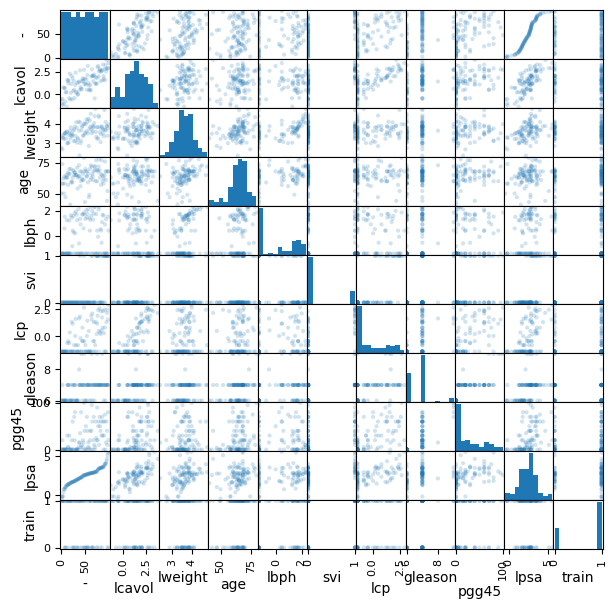

In [2]:
""" Use the scatter-plot-matrix to show the relationship of data in
two-dimensional by creating a scatter plot for each attribute or scatter plot 
together as a matrix. Goal: Spot structural relationships between variables """
scatter_matrix(dataset, figsize=(7,7), alpha=0.2) 
pyplot.show()

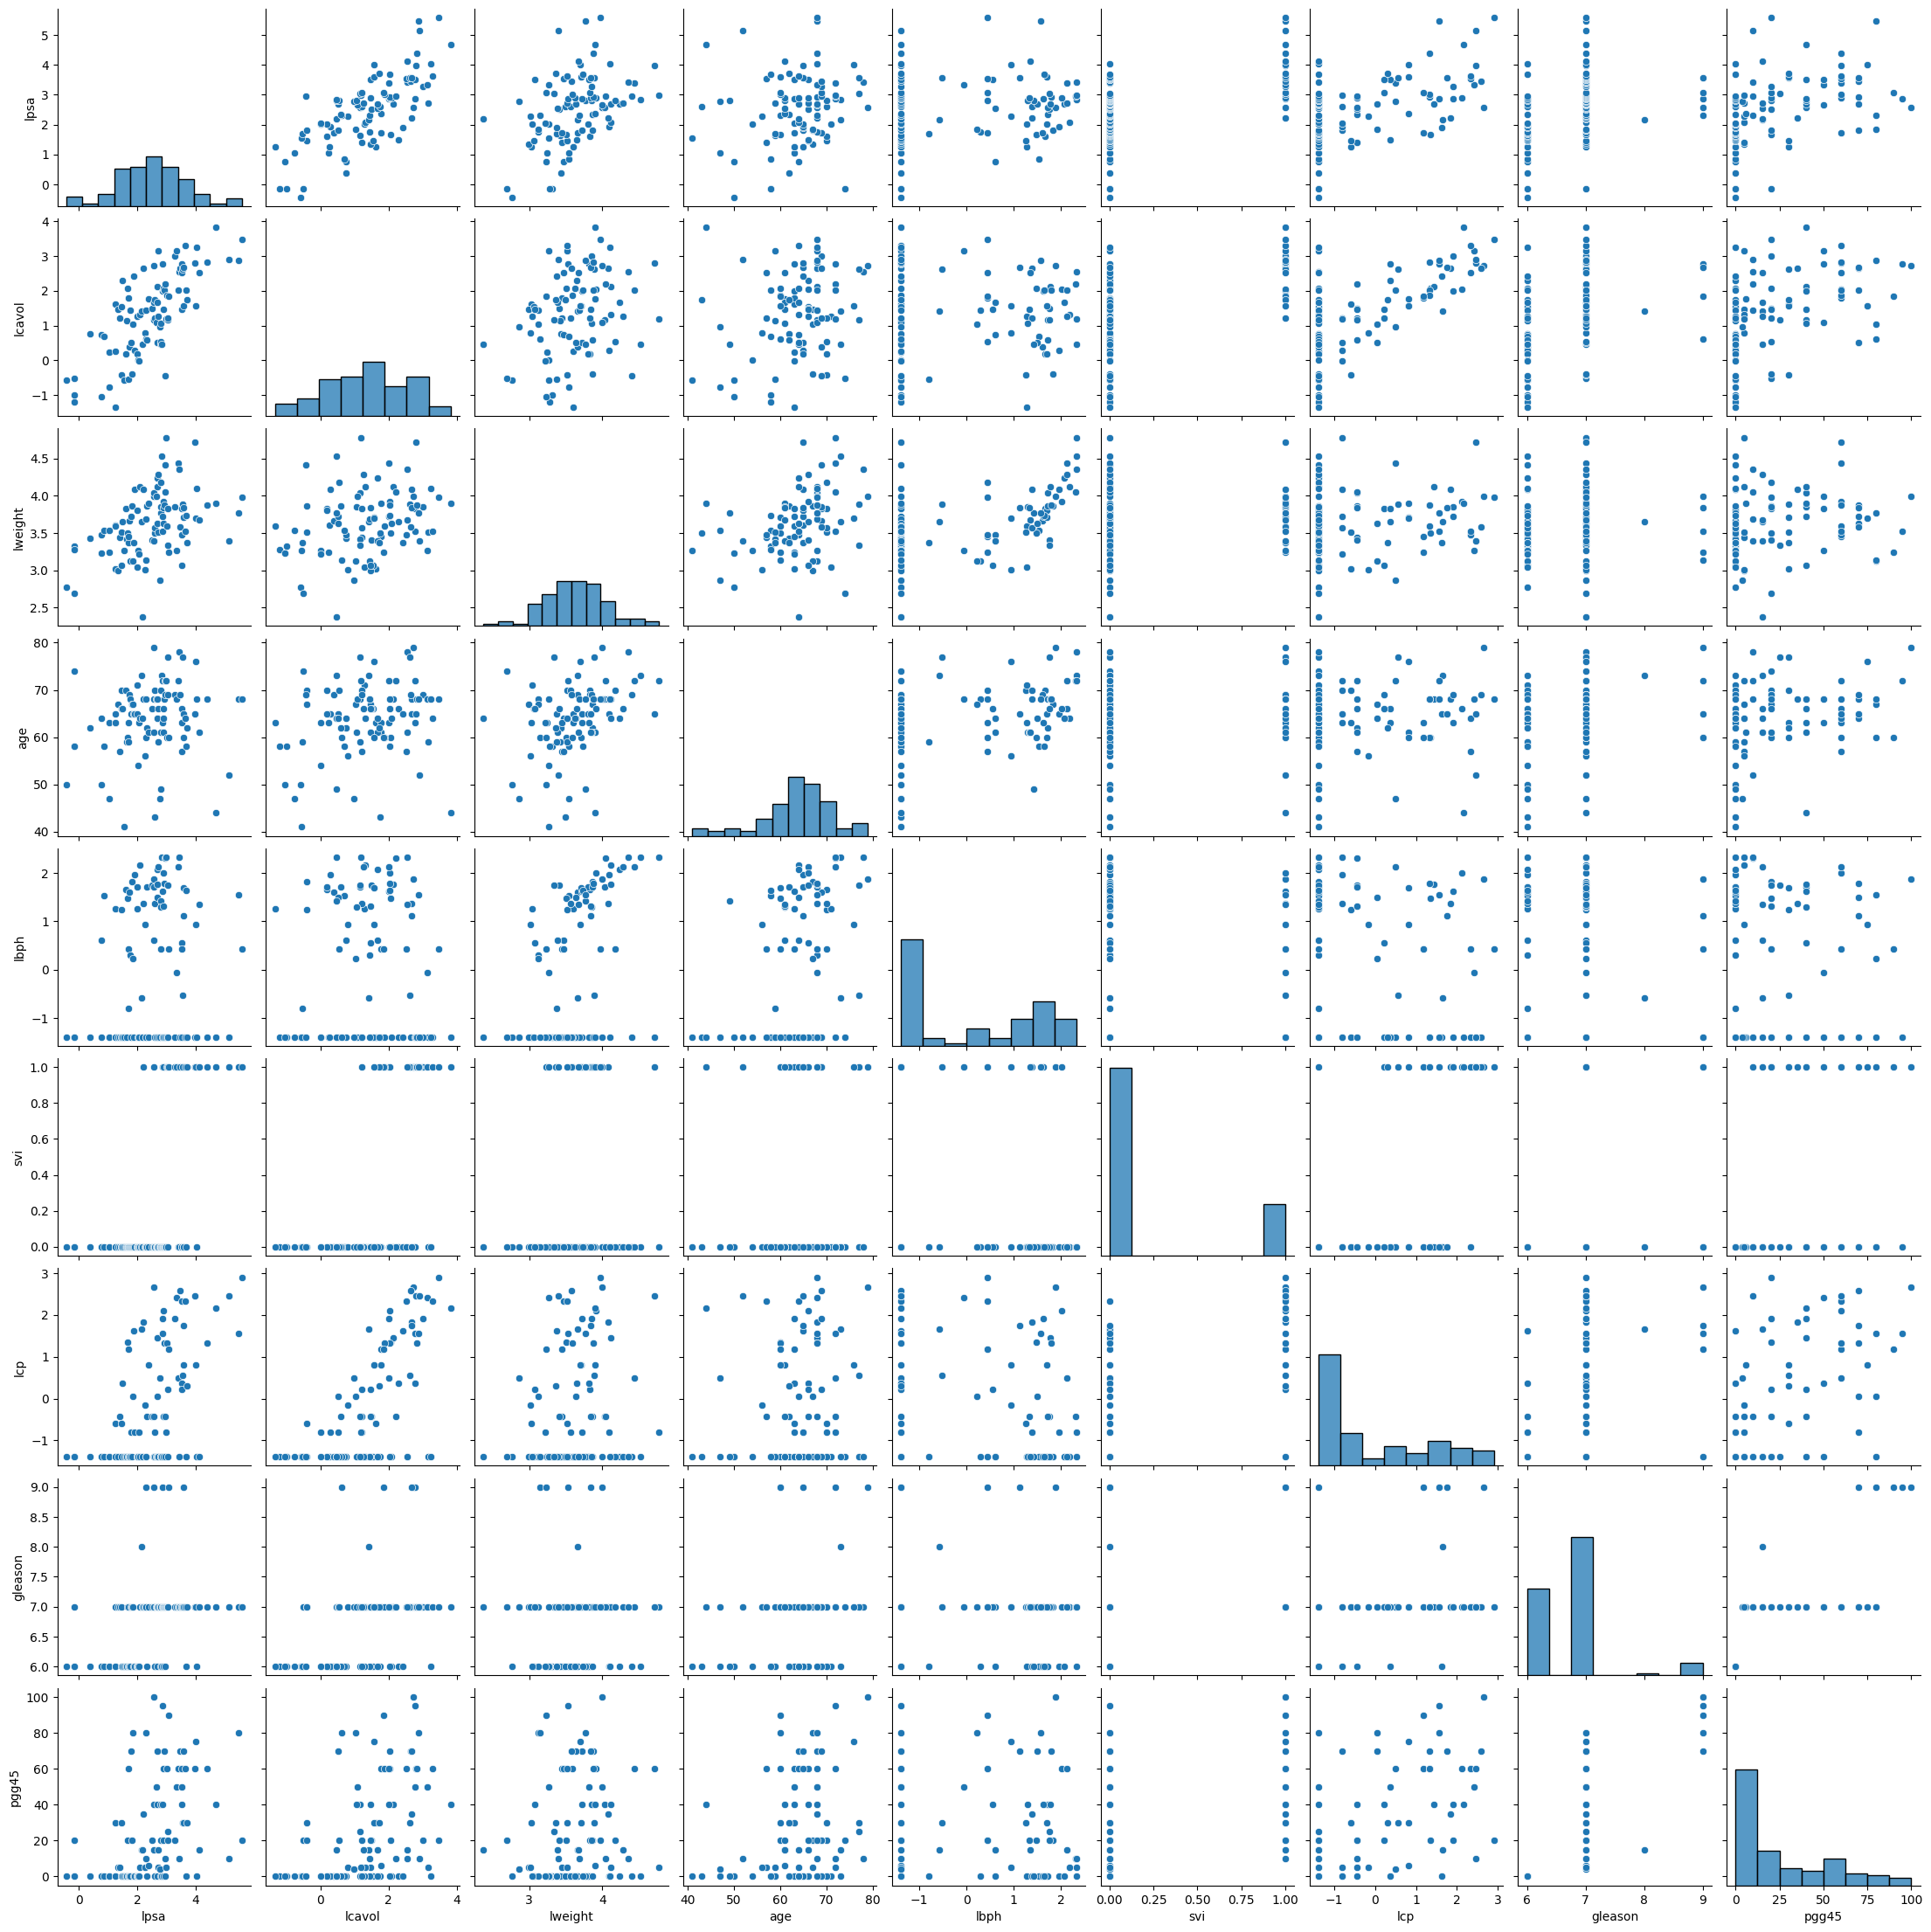

In [3]:
"""  scatterplot matrix with searbon library 
Our target feature to predict here is lpsa -log prostate specific antigen 
The first line shows the response against each of the predictors in turn.
Predictors 'svi' and 'gleason' are categorical. """ 
import seaborn as sns 
features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
target = 'lpsa'
sns.pairplot(dataset, vars=[target]+features, kind='scatter')

In [ ]:
""" 
In Statistics literatures, the inputs (features) are often called predictors, 
or independent variables, where in ML they are features. We refer to the output
as the classical dependent variables. 

Qualitative variables are referred to as discrete variables as well as factors.
The name convention led to naming for regression and classification problems.
Qualitative variables are represented numerically by code, and for this reason
we refer to them as targets. 
With two or more categories alternatives are available. We use here via coding
dummy variables. A K-qualitative variable is represented by a vector of K binary 
variables or bits. Also more compact coding schemes are possible. 

We denote: input variable by X - accessed by Xj, quantitative outputs by Y, and 
qualitative outputs by G for group. 
X, Y, G when referring to the generic aspects of a variable.  
"""

In [4]:
""" We can split the data into training and test using flag as 'T':1 for True, 'F':0 for False """ 
is_train_data = dataset.train == 1

""" Correlation matrix shows the correlations among the predictors (also features). 
The scatter matrix above shows every pairwise between the variables. """
dataset[is_train_data][features].corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


**Fit a linear model to the prostate cancer data**

Now we need to fit the effects jointly and untangle the relationships between
the predictors and the target. Build the linear model fit to prostate cancer data. Prediction using the mean training value of lpsa, has a test error of 1.0567 
which is call the base error rate 

- Fit a linear model to the prostate cancer data.  
  - The Z score if the coefficient divided by its standard error. A Z score larger than two in absolute value is significantly non-zero at the p =0.05 level.
- Fit the linear model to the log of prostate-specific antigen, lpsa, after first standardizing the predictors to have unit variance. 
- Randomly split the dataset into training set of size 67 and a test size of 30. 
- Apply least squares estimation to the training set, producing the estimates, 
  standard errors and Z-scores as defined, and measure the effect of droppiung that variable from the model. A Z-score greater than 2 in absolute value is approximately significant at the 5% level. 



In [5]:
""" 
1. The predictors 'svi' and 'gleason' are binary variables, gleason is a categorical. 
2. The'lcaval' and 'lcp' show strong correlation with 'lpsa' and each other. 
3. Prediction using the mean training value of lpsa, has a test error of 1.0567 
which is call the base error rate. """ 
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
X, y = dataset[features].values, dataset[target].values
X_train, y_train = X[is_train_data], y[is_train_data]
X_test, y_test = X[~is_train_data], y[~is_train_data]
na_model = DummyRegressor().fit(X_train, y_train)
base_error_rate = mean_squared_error(y_test, na_model.predict(X_test))
print('Baseline test error', base_error_rate) 
""" Z-score os the coefficient divided by its standard error - Z-score larger 
than two in absolute value is significantly non-zero at p 0.05 level 
We applied least squares estimations to the training set to produce the 
Z-scores, and Standard error. """ 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm 
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
least_squares = sm.OLS(y_train, sm.add_constant(X_train)).fit()
least_squares_params = least_squares.params
table_ = zip(['Intercept'] + features, least_squares_params, 
                   least_squares.bse, least_squares.tvalues) 
#print('least_squares_params', least_squares_params)
print('-----------------------------------------------')
print('---  Term  Coefficient Std. Error  Z Score ----')
print('-----------------------------------------------')
for term, coefficient, std_error, z_score in table_:
  print(f'{term:>10}{coefficient:>10.2f}{std_error:>10.2f}{z_score:>10.2f}')
y_predict = least_squares.predict(sm.add_constant(X_test))
least_squares_rate = mean_squared_error(y_test, y_predict)
least_squares_std_error = np.std((y_test - y_predict)**2, ddof=1)/np.sqrt(y_test.size)
print(f'\nLeast Squares Test Error {least_squares_rate:.2f}')
print(f'Least Squares Std Error {least_squares_std_error:.2f}')

Baseline test error 1.0567332280603818
-----------------------------------------------
---  Term  Coefficient Std. Error  Z Score ----
-----------------------------------------------
 Intercept      2.46      0.09     27.60
    lcavol      0.68      0.13      5.37
   lweight      0.26      0.10      2.75
       age     -0.14      0.10     -1.40
      lbph      0.21      0.10      2.06
       svi      0.30      0.12      2.47
       lcp     -0.29      0.15     -1.87
   gleason     -0.02      0.14     -0.15
     pgg45      0.27      0.15      1.74

Least Squares Test Error 0.52
Least Squares Std Error 0.18


In [ ]:
""" Interprezt Z scores 

Recap of the steps: split the data in 67 for train and 30 for test,
apply least square to the training set, produce estimates, standard error, and
Z-scores. The Z-scores measure the effect of dropping the variable from the model.
A Z-score > 2 in absolute value is approximately significant at 5% level. 
If we have 9 parameters, and 0.025 tail quantiles of T67-9-distribution are +-2.02.
The predictor lcavol shows the strongest effect, with lweight and svi also strong.
lcp not significant if used wth lcavol, without lcavol strongly significant.
Also test the exclusion of a number of terms at once, using the F-statistics 

Illustration with an example 
- drop all non-significant terms age, lcp, gleason and pgg45

F = 
32.81 - 29.43 / (9 -5)
-----------------------------
29.43/(617-9)

= 1.67
with a probability value of 0.17 (Prob(F4,58> 1.67) = 0.17)

The mean prediction error on the test data is 0.52. Prediction using the mean 
training value of 'lpsa' has a test error of 1.057 which is the 'base error rate'
Hence the linear model reduces the error rate by about 50%

We will continue with various selections and shrinking methods on this example 

""" 

In [ ]:
"""
Cross Validation 

All linear models in this example in the book use one-standard-error-rule. 
For each paramter perform K-fold cross validation, find MSE and Std Error, 
select Best model with cross-validation MSE and Std Error, select Least complex 
model with cross-validation MSE and Std Error

n_folds - number of folds for cross validation approach 
estimator - regression or a classification model to be parameterized 
parameter_names and parameter_values - increasing complexity in values 
random_state - the seed of random generated number 
force model index - preselected model index
cv_mean_erros - mean cross validation error for each parameter 
best_model - index pf parameter values for which we have the best mean error
model retrained with selected parameters 
min error and min error std the cv mean and std error for the best param values 

Methods: 
fit(X, y) --> one-standard-error-rule-model 
refit(X, y) --> one-standard-error-rule-model 
fit_all_data(X, y)
predict(X) --> predictions y_predict 
assess(X, y)--> mearn error and std error 
plot() --> plot the results 
"""

In [6]:
from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn.cross_decomposition import PLSRegression 

Generic Code for One-Standard-Error-Rule

In [7]:
""" One Standard Error Rule """ 
class StandardModel:
  def __init__(self, estimator, param_name, param_values,
               model_idx=None, n_folds=10, is_regression=True, random_state=69438):
    self.estimator = estimator
    self.param_name = param_name
    self.param_values = param_values
    self.model_idx = model_idx
    self.n_folds = n_folds
    self.is_regression = is_regression
    self.random_state = random_state

    self.grid_search = GridSearchCV(
        estimator, {param_name: param_values}, 
        cv=10, #KFold(n_folds, True, random_state)
        scoring='neg_mean_squared_error' if is_regression else 'accuracy',
        return_train_score=True #, iid=True
    )
  
  def fit(self, X, y):
    self.grid_search.fit(X, y)
    cv_errors = -np.vstack([
        self.grid_search.cv_results_[
            f'split{i}_test_score'] for i in range(self.n_folds)
    ]).T 
    if not self.is_regression: cv_errors = 1 + cv_errors 
    self.cv_mean_errors = np.mean(cv_errors, axis=1)
    self.cv_mean_errors_std = np.std(
                          cv_errors, ddof=1, axis=1)/np.sqrt(self.n_folds)
    self.best_model = np.argmin(self.cv_mean_errors)
    self.cv_min_error = self.cv_mean_errors[self.best_model]
    self.cv_min_error_std = self.cv_mean_errors_std[self.best_model]
    error_threshold = self.cv_min_error + self.cv_min_error_std
    self.model_idx = np.argmax(self.cv_min_error < error_threshold)
    return self.fit_all_data(X, y) 

  def fit_all_data(self, X, y):
    self.model = self.estimator 
    self.model.set_params(**{self.param_name: self.param_values[self.model_idx]})
    self.model.fit(X, y)
    return self 

  def refit(self, X, y, model_idx):
    self.model_idx = model_idx 
    return self.fit_all_data(X, y)

  def predict(self, X):
    return np.squeeze(self.model.predict(X))
  
  def assess(self, X, y):
    y_predict = self.predict(X)
    errors = (y - y_predict)**2 if self.is_regression else 1.0*(y !=y_predict)
    error = np.mean(errors)
    error_std = np.std(errors, ddof=1) / np.sqrt(y.size)
    return error, error_std

In [8]:
""" Baseline Regression """ 
baseline = StandardModel(
    DummyRegressor(), 'constant', [None]
).fit(X, y)

In [16]:
def plot_crossval_results(title, x_label, model, complexities):
  if complexities is None: 
    complexities = model.param_values
  complexities = [0] + complexities
  means = np.hstack((baseline.cv_mean_errors, model.cv_mean_errors))
  stds = np.hstack((baseline.cv_mean_errors_std, model.cv_mean_errors_std))  
  fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
  ax.plot(complexities, means, c=orange_, linewidth=0.5)
  ax.errorbar(complexities, means, color=orange_, elinewidth=0.5,marker='o', markersize=3, yerr=stds, ecolor=blue_)  
  ax.axhline(y=model.cv_min_error + model.cv_min_error_std,c=purple_, linewidth=0.5)
  ax.axvline(x=complexities[model.model_idx + 1],c=purple_, linewidth=1)
  for i in ax.get_yticklabels() + ax.get_xticklabels(): i.set_fontsize(8)
  ax.text(ax.get_xlim()[0], 1.9, title, color=gray__, fontsize=8)
  ax.set_xlabel(x_label, color=gray__, fontsize=8)
  ax.set_ylabel('CV error', color=gray__, fontsize=8)
  parms = {'color': gray__, 'fontsize': 8}
  lim = ax.get_xlim()
  text_x = lim[1] - (lim[1]-lim[0])*0.02
  test_error, test_error_std = model.assess(X_test, y_test)
  ax.text(text_x, 1.70, f'Test Error: {test_error:.2f}', **parms, ha='right')
  ax.text(text_x, 1.60, f'Std Error: {test_error_std:.2f}', **parms, ha='right')

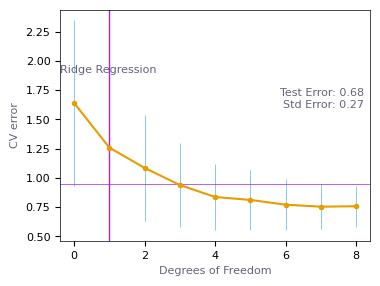

In [17]:
""" Ridge Regression """ 
ridge_regression = StandardModel(
    Ridge(), 'alpha', [300, 150, 70, 30, 22, 10, 4, 1e-05]
).fit(X_train, y_train) 
ridge_params = np.hstack((ridge_regression.model.intercept_, ridge_regression.model.coef_))
plot_crossval_results('Ridge Regression', 'Degrees of Freedom', ridge_regression, list(np.arange(1, 9)))

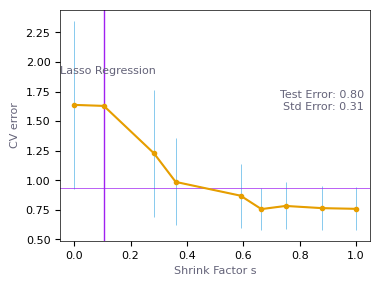

In [18]:
""" Lasso Regression """ 
lasso_regresssion = StandardModel(
    Lasso(), 'alpha', [0.680, 0.380, 0.201, 0.100, 0.004, 0.027, 0.015, 0.01]
).fit(X_train, y_train) 
lasso_params = np.hstack(
    (lasso_regresssion.model.intercept_, lasso_regresssion.model.coef_))

plot_crossval_results('Lasso Regression', 'Shrink Factor s',lasso_regresssion, 
                      [0.105, 0.283, 0.360, 0.590, 0.664, 0.750, 0.880, 1])

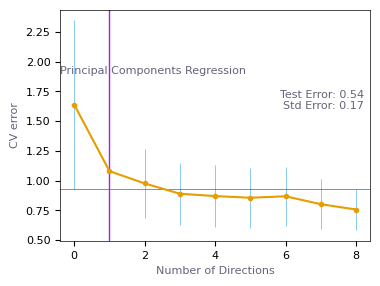

In [19]:
""" Principal Components Regression """ 
pca_model = Pipeline([ ('pca', PCA()),
                       ('regression', LinearRegression()) ])
pca_regression = StandardModel(
    pca_model, 'pca__n_components', list(range(1,9))
).fit(X_train, y_train) 
pca, lr = pca_regression.model['pca'], pca_regression.model['regression']
pca_params = np.zeros(8)
intercept = lr.intercept_

for i in range(7):
  pca_params += lr.coef_[0] *pca.components_[0, i]
  #intercept -= lr.coef_[0]*(pca.mean_[0] @ pca.components_[0, i] )
pca_params = np.hstack(([pca_params]))
plot_crossval_results('Principal Components Regression', 'Number of Directions',
                      pca_regression, None)

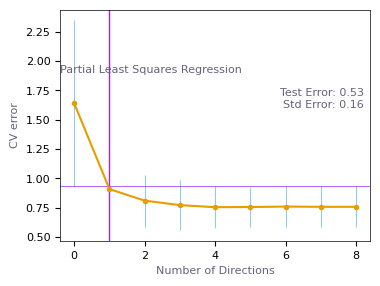

In [20]:
""" Partial Least Squares """ 
pls_regression = StandardModel(
    PLSRegression(scale=False), 'n_components', list(np.arange(1,9)), model_idx=1
).fit(X_train, y_train) 

pls_params = np.hstack((pls_regression.model.coef_))

plot_crossval_results('Partial Least Squares Regression', 'Number of Directions',
                      pls_regression, None)

In [ ]:
""" Best Subset Regression """ 

In [ ]:
""" Summarize in Table each Approach """ 